<a href="https://colab.research.google.com/github/kokchun/Databehandling-21/blob/main/Lectures/L4.1-api-stocks.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - Stockdata 1 - API
---

This is a lecture note on stock data from API - but it's built upon contents from pandas and previous course:

- Python programming

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to merging. I encourage you to read further about API.

Read more

- [video - API-key .env](https://www.youtube.com/watch?v=YdgIWTYQ69A)
- [wikipedia - REST API theory](https://en.wikipedia.org/wiki/Representational_state_transfer)
- [video - Python - requests](https://www.youtube.com/watch?v=tb8gHvYlCFs)
- [w3schools - requests](https://www.w3schools.com/python/module_requests.asp)

---


## Stockdata API

Go into [Alpha Vantage](https://www.alphavantage.co/documentation/) and read the documentation of the time series APIs

- Go into [claim API key](https://www.alphavantage.co/support/#api-key) and fill in the form to claim your free API-key

- You will be using the API key to access stock data 您将使用 API 密钥访问股票数据

- Create a file called .env and type:创建一个名为 .env 的文件并输入：

```py
ALPHA_API_KEY =364MMOS8EVCUZY3S
```

- the dots should be your API key 点应该是您的 API 密钥
- go into your .gitignore file in your repo and make sure that there is .env there so that you don't push the .env file to a public Github repo where anyone can access your key and do stuffs in your name 进入你的 repo 中的 .gitignore 文件，并确保那里有 .env ，这样你就不会将 .env 文件推送到公共 Github 存储库，任何人都可以在那里访问你的密钥并以你的名义做事

**Setup**

- pipenv install python-dotenv

[Symbols of stocks](https://www.nasdaq.com/market-activity/stocks/screener) that is useful for get-request


In [56]:
import os
from dotenv import load_dotenv
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

load_dotenv()
#api_key = os.getenv("ALPHA_API_KEY")
api_key = os.getenv("364MMOS8EVCUZY3S")
symbol="AAPL" # 只提取苹果公司一家
#print(api_key)

url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"
data=requests.get(url).json()
#data

#ALPHA_API_KEY

In [57]:
data["Time Series (Daily)"] 

{'2021-11-17': {'1. open': '150.9950',
  '2. high': '155.0000',
  '3. low': '150.9900',
  '4. close': '153.4900',
  '5. volume': '88807000'},
 '2021-11-16': {'1. open': '149.9400',
  '2. high': '151.4880',
  '3. low': '149.3400',
  '4. close': '151.0000',
  '5. volume': '59256210'},
 '2021-11-15': {'1. open': '150.3700',
  '2. high': '151.8800',
  '3. low': '149.4300',
  '4. close': '150.0000',
  '5. volume': '59222803'},
 '2021-11-12': {'1. open': '148.4300',
  '2. high': '150.4000',
  '3. low': '147.4800',
  '4. close': '149.9900',
  '5. volume': '63245197'},
 '2021-11-11': {'1. open': '148.9600',
  '2. high': '149.4300',
  '3. low': '147.6810',
  '4. close': '147.8700',
  '5. volume': '40999950'},
 '2021-11-10': {'1. open': '150.0200',
  '2. high': '150.1300',
  '3. low': '147.8500',
  '4. close': '147.9200',
  '5. volume': '65187092'},
 '2021-11-09': {'1. open': '150.2000',
  '2. high': '151.4280',
  '3. low': '150.0601',
  '4. close': '150.8100',
  '5. volume': '56573449'},
 '2021

In [58]:
pd.DataFrame(data["Time Series (Daily)"])

,2021-11-17,2021-11-16,2021-11-15,2021-11-12,2021-11-11,2021-11-10,2021-11-09,2021-11-08,2021-11-05,2021-11-04,...,1999-11-12,1999-11-11,1999-11-10,1999-11-09,1999-11-08,1999-11-05,1999-11-04,1999-11-03,1999-11-02,1999-11-01
1. open,150.9950,149.9400,150.3700,148.4300,148.9600,150.0200,150.2000,151.4100,151.8900,151.5800,...,91.9400,91.5900,88.2500,94.3700,87.7500,84.6200,82.0600,81.6200,78.0000,80.0000
2. high,155.0000,151.4880,151.8800,150.4000,149.4300,150.1300,151.4280,151.5700,152.2000,152.4300,...,92.0000,92.6200,93.2500,94.5000,97.7300,88.3700,85.3700,83.2500,81.6900,80.6900
3. low,150.9900,149.3400,149.4300,147.4800,147.6810,147.8500,150.0601,150.1600,150.0600,150.6400,...,87.3700,89.8700,88.1200,88.0000,86.7500,84.0000,80.6200,81.0000,77.3100,77.3700
4. close,153.4900,151.0000,150.0000,149.9900,147.8700,147.9200,150.8100,150.4400,151.2800,150.9600,...,90.6200,92.2500,91.4400,89.6200,96.3700,88.3100,83.6200,81.5000,80.2500,77.6200
5. volume,88807000,59256210,59222803,63245197,40999950,65187092,56573449,55020868,65463883,60394616,...,2491600,2409600,5159800,7224800,8490400,3721500,3384700,2932700,3564600,2487300


In [106]:
df=pd.DataFrame(data["Time Series (Daily)"]).transpose().astype(float) #位置转置
df.head()

,1. open,2. high,3. low,4. close,5. volume
2021-11-17,118.38,119.3300,117.78,118.06,4043289.0
2021-11-16,118.92,119.9000,118.42,118.46,4750760.0
2021-11-15,119.54,120.1600,118.31,118.87,5046321.0
2021-11-12,120.00,120.6400,118.78,118.96,5376966.0
2021-11-11,120.90,121.7894,120.08,120.27,4643257.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5549 entries, 2021-11-17 to 1999-11-01
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    5549 non-null   float64
 1   2. high    5549 non-null   float64
 2   3. low     5549 non-null   float64
 3   4. close   5549 non-null   float64
 4   5. volume  5549 non-null   float64
dtypes: float64(5)
memory usage: 260.1+ KB


In [107]:
df.index

Index(['2021-11-17', '2021-11-16', '2021-11-15', '2021-11-12', '2021-11-11',
       '2021-11-10', '2021-11-09', '2021-11-08', '2021-11-05', '2021-11-04',
       ...
       '1999-11-12', '1999-11-11', '1999-11-10', '1999-11-09', '1999-11-08',
       '1999-11-05', '1999-11-04', '1999-11-03', '1999-11-02', '1999-11-01'],
      dtype='object', length=5549)

In [108]:
df.index=pd.to_datetime(df.index)
print(df.index.dtype)
df.head()

datetime64[ns]


,1. open,2. high,3. low,4. close,5. volume
2021-11-17,118.38,119.3300,117.78,118.06,4043289.0
2021-11-16,118.92,119.9000,118.42,118.46,4750760.0
2021-11-15,119.54,120.1600,118.31,118.87,5046321.0
2021-11-12,120.00,120.6400,118.78,118.96,5376966.0
2021-11-11,120.90,121.7894,120.08,120.27,4643257.0


In [109]:
df.loc["2021"] #只提取2021的数据

,1. open,2. high,3. low,4. close,5. volume
2021-11-17,118.38,119.3300,117.78,118.06,4043289.0
2021-11-16,118.92,119.9000,118.42,118.46,4750760.0
2021-11-15,119.54,120.1600,118.31,118.87,5046321.0
2021-11-12,120.00,120.6400,118.78,118.96,5376966.0
2021-11-11,120.90,121.7894,120.08,120.27,4643257.0
...,...,...,...,...,...
2021-01-08,128.57,129.3200,126.98,128.53,4676487.0
2021-01-07,130.04,130.4600,128.26,128.99,4507382.0
2021-01-06,126.90,131.8800,126.72,129.29,7956740.0
2021-01-05,125.01,126.6800,124.61,126.14,6114619.0


In [110]:
df.loc["2021-10"] # 提取10月份的数据

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,125.43,126.320,124.9100,125.10,5916789.0
2021-10-28,125.17,126.310,124.6200,125.84,6503003.0
2021-10-27,127.44,127.880,125.0100,125.17,6973432.0
2021-10-26,127.52,128.300,126.7550,127.13,8520872.0
2021-10-25,127.53,128.650,126.9400,127.64,6374038.0
2021-10-22,128.05,130.250,126.6110,127.88,11582195.0
2021-10-21,133.51,133.720,128.1000,128.33,31466529.0
2021-10-20,141.68,142.200,140.7000,141.90,6189255.0
2021-10-19,141.08,142.940,140.5201,141.98,4339548.0
2021-10-18,144.00,144.940,141.7590,142.32,6154055.0


In [111]:
df.loc["2021-10-20":"2021-10-29"] #取这个时间区间段

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,125.43,126.32,124.910,125.10,5916789.0
2021-10-28,125.17,126.31,124.620,125.84,6503003.0
2021-10-27,127.44,127.88,125.010,125.17,6973432.0
2021-10-26,127.52,128.30,126.755,127.13,8520872.0
2021-10-25,127.53,128.65,126.940,127.64,6374038.0
2021-10-22,128.05,130.25,126.611,127.88,11582195.0
2021-10-21,133.51,133.72,128.100,128.33,31466529.0


- 提取四家公司的股票数据

In [82]:
import os
from dotenv import load_dotenv
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
stock_list = []

load_dotenv()
api_key=os.getenv("ALPHA_API_KEY")

for symbol in symbols:
    function = "TIME_SERIES_DAILY"

    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (Daily)"]).transpose()
    df = df["4. close"].rename(symbol).astype(float)
    print(df)
    stock_list.append(df)
    time.sleep(15)

2021-11-17    153.49
2021-11-16    151.00
2021-11-15    150.00
2021-11-12    149.99
2021-11-11    147.87
               ...  
1999-11-05     88.31
1999-11-04     83.62
1999-11-03     81.50
1999-11-02     80.25
1999-11-01     77.62
Name: AAPL, Length: 5549, dtype: float64
2021-11-17    292.61
2021-11-16    302.03
2021-11-15    300.25
2021-11-12    303.90
2021-11-11    303.90
               ...  
1999-11-05     28.25
1999-11-04     29.19
1999-11-03     27.44
1999-11-02     25.00
1999-11-01     23.50
Name: NVDA, Length: 5549, dtype: float64
2021-11-17    1089.01
2021-11-16    1054.73
2021-11-15    1013.39
2021-11-12    1033.42
2021-11-11    1063.51
               ...   
2010-07-06      16.11
2010-07-02      19.20
2010-07-01      21.96
2010-06-30      23.83
2010-06-29      23.89
Name: TSLA, Length: 2869, dtype: float64
2021-11-17    118.06
2021-11-16    118.46
2021-11-15    118.87
2021-11-12    118.96
2021-11-11    120.27
               ...  
1999-11-05     90.25
1999-11-04     91.56
1999-

In [89]:
# concatenate the list of series to a df
stocks = pd.concat(stock_list, axis=1)
stocks.to_csv("stocks.csv") # save to csv 
stocks
#axis： 需要合并链接的轴，(axis=0)是行，就是纵向相加，（列对齐） (axis=1)是列 就是横向相加，（行对齐）
#join：连接的方式 inner，或者outer

,AAPL,NVDA,TSLA,IBM
2021-11-17,153.49,292.61,1089.01,118.06
2021-11-16,151.00,302.03,1054.73,118.46
2021-11-15,150.00,300.25,1013.39,118.87
2021-11-12,149.99,303.90,1033.42,118.96
2021-11-11,147.87,303.90,1063.51,120.27
...,...,...,...,...
1999-11-05,88.31,28.25,NaN,90.25
1999-11-04,83.62,29.19,NaN,91.56
1999-11-03,81.50,27.44,NaN,94.37
1999-11-02,80.25,25.00,NaN,94.81


In [90]:
stocks=pd.read_csv("stocks.csv",index_col=0,parse_dates=True)
stocks

,AAPL,NVDA,TSLA,IBM
2021-11-17,153.49,292.61,1089.01,118.06
2021-11-16,151.00,302.03,1054.73,118.46
2021-11-15,150.00,300.25,1013.39,118.87
2021-11-12,149.99,303.90,1033.42,118.96
2021-11-11,147.87,303.90,1063.51,120.27
...,...,...,...,...
1999-11-05,88.31,28.25,NaN,90.25
1999-11-04,83.62,29.19,NaN,91.56
1999-11-03,81.50,27.44,NaN,94.37
1999-11-02,80.25,25.00,NaN,94.81


In [91]:
stocks.index

DatetimeIndex(['2021-11-17', '2021-11-16', '2021-11-15', '2021-11-12',
               '2021-11-11', '2021-11-10', '2021-11-09', '2021-11-08',
               '2021-11-05', '2021-11-04',
               ...
               '1999-11-12', '1999-11-11', '1999-11-10', '1999-11-09',
               '1999-11-08', '1999-11-05', '1999-11-04', '1999-11-03',
               '1999-11-02', '1999-11-01'],
              dtype='datetime64[ns]', length=5549, freq=None)

In [92]:
stock_2021 = stocks.loc["2021"]
stock_2021

,AAPL,NVDA,TSLA,IBM
2021-11-17,153.49,292.61,1089.01,118.06
2021-11-16,151.00,302.03,1054.73,118.46
2021-11-15,150.00,300.25,1013.39,118.87
2021-11-12,149.99,303.90,1033.42,118.96
2021-11-11,147.87,303.90,1063.51,120.27
...,...,...,...,...
2021-01-08,132.05,531.07,880.02,128.53
2021-01-07,130.92,533.76,816.04,128.99
2021-01-06,126.60,504.58,755.98,129.29
2021-01-05,131.01,536.19,735.11,126.14


Plot stock 4 (2*2) subplot

(2, 2)
(4,)


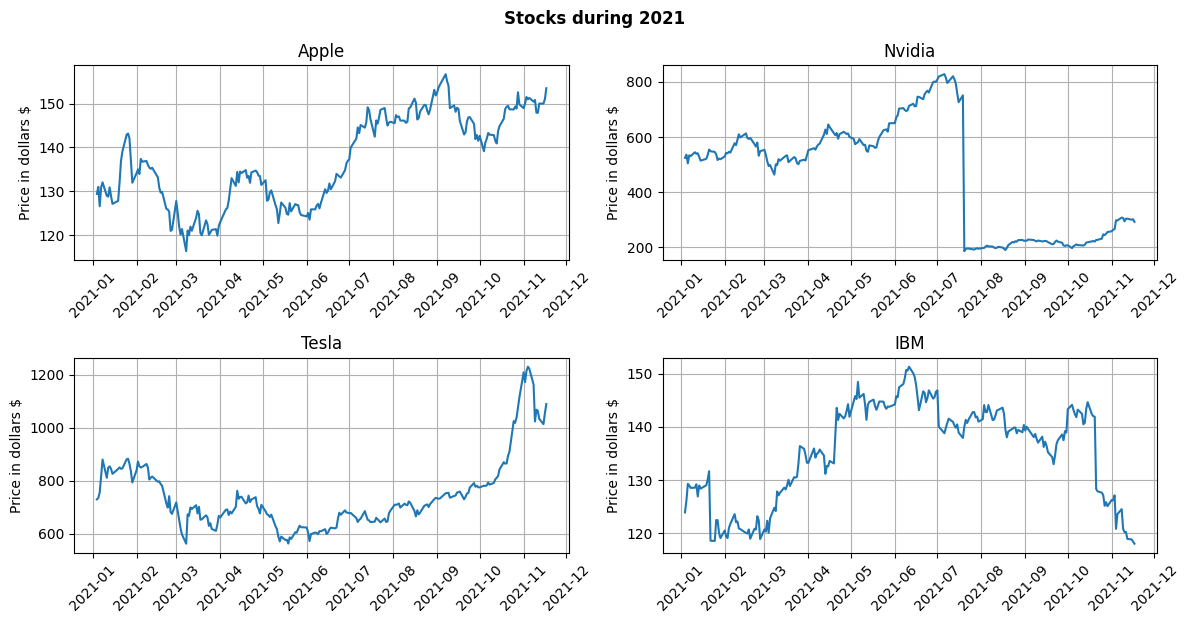

In [123]:

fig, axes = plt.subplots(2,2, dpi=100, figsize=(12,6)) #2*2 图
print(axes.shape)
print(axes.flatten().shape)

stock_2021 = stocks.loc["2021"]

stock_names = dict(AAPL="Apple", NVDA = "Nvidia", TSLA = "Tesla", IBM = "IBM")
for ax, symbol in zip(axes.flatten(), stock_names):
    #print(symbol)
    sns.lineplot(data=stock_2021, x=stock_2021.index, y=symbol, ax=ax)
    ax.tick_params(axis="x", rotation=45)
    ax.set(title=f"{stock_names[symbol]}", ylabel="Price in dollars $")
    ax.grid() #图形网格线

fig.tight_layout()
fig.suptitle("Stocks during 2021", y=1.03, fontweight="bold")
plt.savefig("stocks2021.png", facecolor="white")

- 另外中类型图

In [96]:
import plotly_express as px

# initial plot
px.line(stock_2021, x=stock_2021.index, y=["AAPL", "NVDA", "TSLA", "IBM"],
        labels={"variable": "Stock", "index": "Year", "value": "Value $"},
        title="Stock of company Apple, Nvda,Tsla,IBM", log_y=True)

# ValueError: The truth value of a DataFrame is ambiguous.DataFrame 的真值是不明确的。
#  Use a.empty, a.bool(), a.item(), a.any() or a.all().        

---
## Working with time series


In [73]:
print(stocks.index.dtype)
# type cast index from object to datetime 类型转换索引从对象到日期时间
stocks.index = pd.to_datetime(stocks.index) # 类型转换日期类型to?datetime,还有to_numeric, to_timedelta
print(stocks.index.dtype) 
stocks.head()


datetime64[ns]
datetime64[ns]


,AAPL,NVDA,TSLA,IBM
2021-11-17,153.49,292.61,1089.01,118.06
2021-11-16,151.00,302.03,1054.73,118.46
2021-11-15,150.00,300.25,1013.39,118.87
2021-11-12,149.99,303.90,1033.42,118.96
2021-11-11,147.87,303.90,1063.51,120.27


- 提取7天前的数据 ，此刻日期是11月18日，所以

In [118]:
from datetime import datetime, timedelta
now = datetime.now()

# last seven days 7天前的数据
last_week = (now - timedelta(7)).strftime("%Y-%m-%d")  #定义上个星期是 现在的时间减去七天
now = str(now.date())
#now  #(output'2021-11-18' )


# solve deprecation warning: # 解决弃用警告：
# https://stackoverflow.com/questions/66116893/iterating-through-dictionaries-futurewarning-value-based-partial-slicing-on-n

stocks.sort_index().loc[last_week:now] #从上个星期到现在的四家股票数据

,AAPL,NVDA,TSLA,IBM
2021-11-11,147.87,303.90,1063.51,120.27
2021-11-12,149.99,303.90,1033.42,118.96
2021-11-15,150.00,300.25,1013.39,118.87
2021-11-16,151.00,302.03,1054.73,118.46
2021-11-17,153.49,292.61,1089.01,118.06


---
## Download csv